<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Storytelling, Dashboards e Técnicas de Apresentação Para Cientistas de Dados</font>
## <font color='blue'>Projeto 1 - Parte 1</font>
### <font color='blue'>Engajando a Audiência Através de História Sobre a Análise dos Dados</font>

## Instalando e Carregando os Pacotes

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
# Imports
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset1.csv')

In [5]:
# Shape
df_dsa.shape

(116581, 53)

In [6]:
# Amostra dos dados
df_dsa.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,8,1,18,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017,8,2,18,Wed,Aug


In [7]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   order_id3                      116581 non-null  object 
 2   customer_id3                   116581 non-null  object 
 3   order_status                   116581 non-null  object 
 4   order_purchase_timestamp       116581 non-null  object 
 5   order_approved_at              116581 non-null  object 
 6   order_delivered_carrier_date   116581 non-null  object 
 7   order_delivered_customer_date  116581 non-null  object 
 8   order_estimated_delivery_date  116581 non-null  object 
 9   order_item_id                  116581 non-null  float64
 10  product_id3                    116581 non-null  object 
 11  seller_id3                     116581 non-null  object 
 12  shipping_limit_date           

## Funções Customizadas Para Visualização dos Dados

Você sempre tem a opção de criar funções Python para personalizar ou customizar seus gráficos.

In [8]:
# Função para formatar os eixos de um gráfico (ax) com opção para borda direita
def dsa_format_spines(ax, right_border = True):
    
    # Define a cor da borda inferior
    ax.spines['bottom'].set_color('#000000')  
    
    # Define a cor da borda esquerda
    ax.spines['left'].set_color('#000000')  
    
    # Torna a borda superior invisível
    ax.spines['top'].set_visible(False)   
    
    # Verifica se a borda direita deve ser visível
    if right_border:       
        
        # Se sim, define a cor da borda direita como branco
        ax.spines['right'].set_color('#FFFFFF')  
        
    else:
        
        # Se não, também define a cor da borda direita como branco
        ax.spines['right'].set_color('#FFFFFF') 
    
    # Define a cor de fundo do gráfico como branco
    ax.patch.set_facecolor('#FFFFFF')          

https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [9]:
# Define uma função para criar um gráfico de contagem (count plot)
def dsa_count_plot(feature, df, colors = 'Greens_r', hue = False, ax = None, title = ''):
    
    # Inicializa uma variável com o número total de entradas no dataframe
    ncount = len(df)
    
    # Cria um gráfico de contagem com ou sem uma variável de agrupamento (hue)
    if hue != False:
        ax = sns.countplot(x = feature, data = df, palette = colors, hue = hue, ax = ax)
    else:
        ax = sns.countplot(x = feature, data = df, palette = colors, ax = ax)
        
    # Chama a função para formatar as bordas do gráfico
    dsa_format_spines(ax)

    # Calcula e anota (imprime no gráfico) a porcentagem de cada barra no gráfico
    for p in ax.patches:
        
        # Obtém as coordenadas x do retângulo da barra
        x = p.get_bbox().get_points()[:,0] 
        
        # Obtém a coordenada y do topo do retângulo da barra
        y = p.get_bbox().get_points()[1,1] 
        
        # Anota a porcentagem acima da barra
        ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha = 'center', va = 'bottom') 
    
    # Define o título do gráfico com base na presença ou ausência da variável de agrupamento (hue)
    if not hue:
        
        # Sem variável de agrupamento
        ax.set_title(df[feature].describe().name + ' Análise', size = 13, pad = 15) 
        
    else:
        
        # Com variável de agrupamento  
        ax.set_title(df[feature].describe().name + ' Analisado Por ' + hue, size = 13, pad = 15) 
    
    # Se um título personalizado foi fornecido, ele é definido aqui
    if title != '':
        ax.set_title(title)  
    
    # Ajusta o layout do gráfico para evitar sobreposições de elementos gráficos
    plt.tight_layout()

In [10]:
# Define uma função para criar um gráfico de barras
def dsa_bar_plot(x, y, df, colors = 'Greens_r', hue = False, ax = None, value = False, title = ''):
    
    # Tenta calcular o total da variável y, se falhar, calcula o total da variável x
    try:
        
        # Calcula o total dos valores da coluna y
        ncount = sum(df[y]) 
        
    except:
        
        # Calcula o total dos valores da coluna x em caso de erro com y
        ncount = sum(df[x]) 

    # Cria um gráfico de barras com ou sem uma variável de agrupamento (hue)
    if hue != False:
        
        # Com variável de agrupamento
        ax = sns.barplot(x = x, y = y, data = df, palette = colors, hue = hue, ax = ax, ci = None) 
        
    else:
        
        # Sem variável de agrupamento
        ax = sns.barplot(x = x, y = y, data = df, palette = colors, ax = ax, ci = None) 

    # Chama a função para formatar as bordas do gráfico 
    dsa_format_spines(ax)

    # Anota o valor ou a porcentagem sobre cada barra no gráfico
    for p in ax.patches:
        
        # Obtém as coordenadas x do retângulo da barra
        xp = p.get_bbox().get_points()[:,0] 
        
        # Obtém a coordenada y do topo do retângulo da barra
        yp = p.get_bbox().get_points()[1,1] 
        
        # Se verdadeiro 
        if value:
            
            # Anota o valor em milhares se value=True
            ax.annotate('{:.2f}k'.format(yp / 1000), (xp.mean(), yp), ha = 'center', va = 'bottom') 
            
        else:
            
            # Anota a porcentagem se value=False
            ax.annotate('{:.1f}%'.format(100. * yp / ncount), (xp.mean(), yp), ha = 'center', va = 'bottom') 
            
    # Define o título do gráfico com base na presença ou ausência da variável de agrupamento (hue)
    if not hue:
        
        # Sem variável de agrupamento
        ax.set_title(df[x].describe().name + ' Análise', size = 12, pad = 15) 
        
    else:
        
        # Com variável de agrupamento
        ax.set_title(df[x].describe().name + ' Analisado Por ' + hue, size = 12, pad = 15) 
    
    # Se um título personalizado foi fornecido, ele é definido aqui
    if title != '':
        
        # Define o título personalizado
        ax.set_title(title) 
    
    # Ajusta o layout do gráfico para evitar sobreposições de elementos gráficos
    plt.tight_layout()

## Cena 1 - Evolução das Vendas ao Longo do Tempo

In [11]:
# Copia o dataset
df = df_dsa.copy()

In [12]:
# Colunas
df.columns

Index(['order_id', 'order_id3', 'customer_id3', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id3',
       'seller_id3', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_id3', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'customer_unique_id', 'customer_uniqueid3',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_id', 'seller_zip_code_prefix', 'seller_city', '

### Pergunta 1.1 - Como Foi a Performance de Vendas Por Ano (em Termos Percentuais)? 

In [13]:
# Checa o total de registros por ano
df.order_purchase_year.value_counts()

order_purchase_year
2018    63199
2017    52994
2016      388
Name: count, dtype: int64

In [14]:
# Cria datasets para cada ano
df_2016 = df.query('order_purchase_year=="2016"')
df_2017 = df.query('order_purchase_year=="2017"')
df_2018 = df.query('order_purchase_year=="2018"')

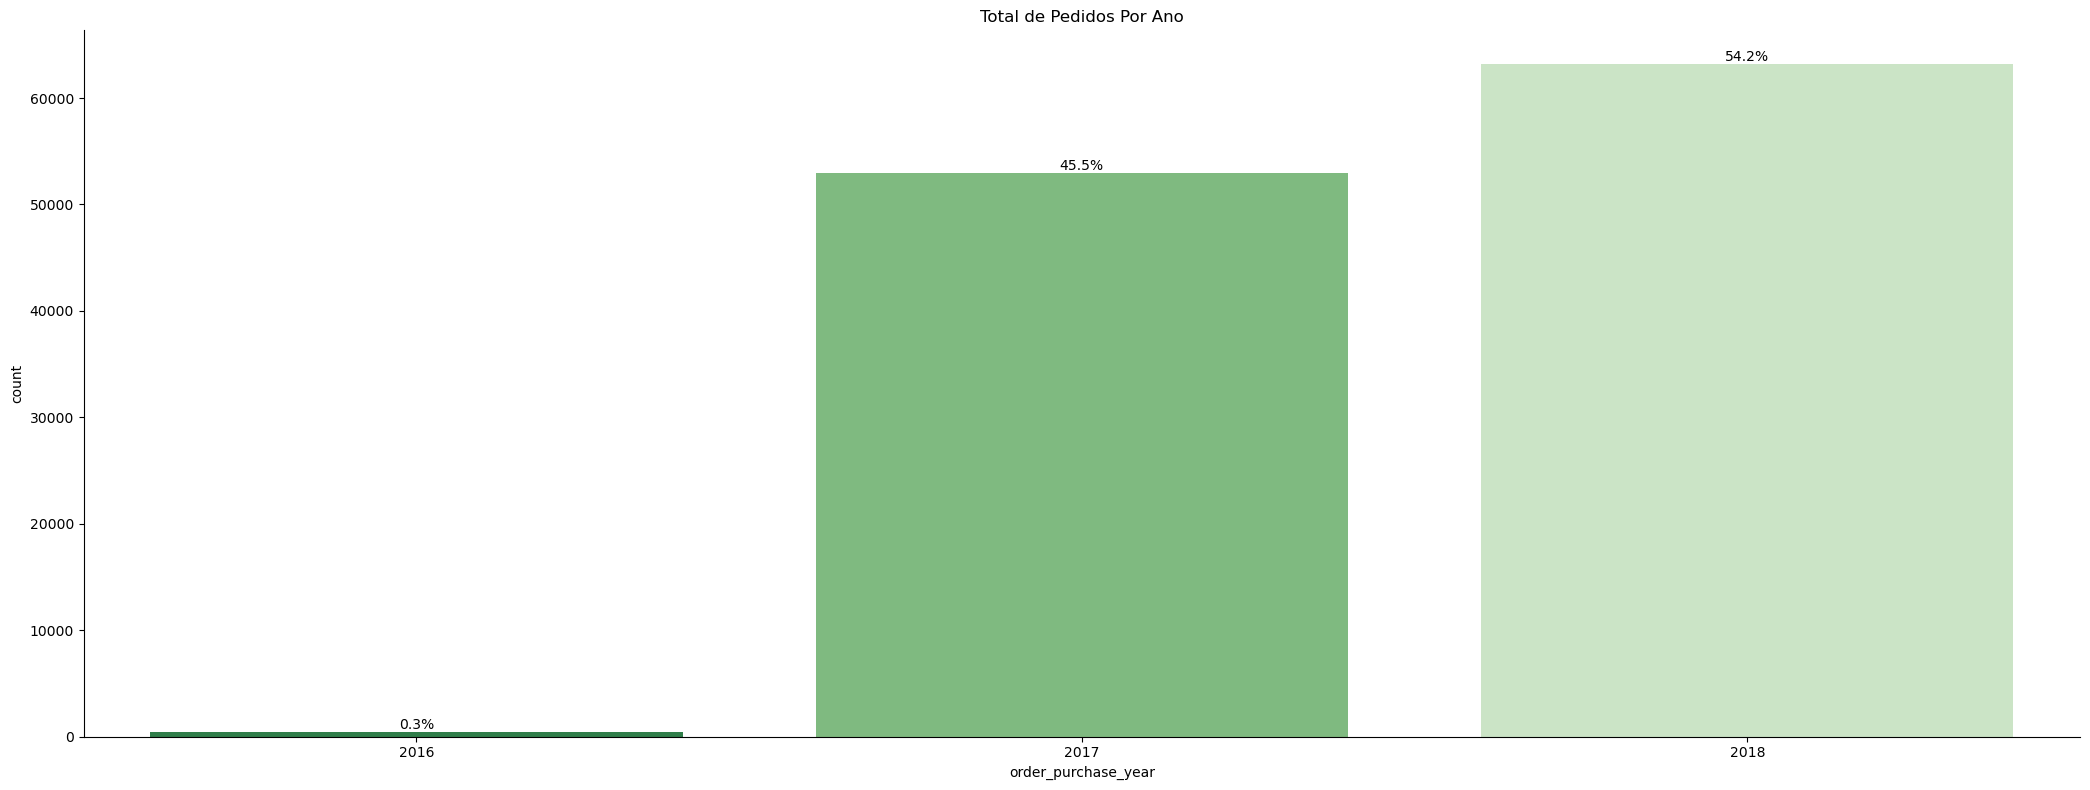

In [15]:
# Total de Pedidos Por Ano
fig, axs = plt.subplots(1, 1, figsize = (21, 8))
dsa_count_plot(feature = 'order_purchase_year', 
               df = df, 
               ax = axs, 
               title = 'Total de Pedidos Por Ano')
plt.show();

### Pergunta 1.2 - Como Foi a Performance de Vendas de Cada Mês em Cada Ano (em Termos Percentuais)?

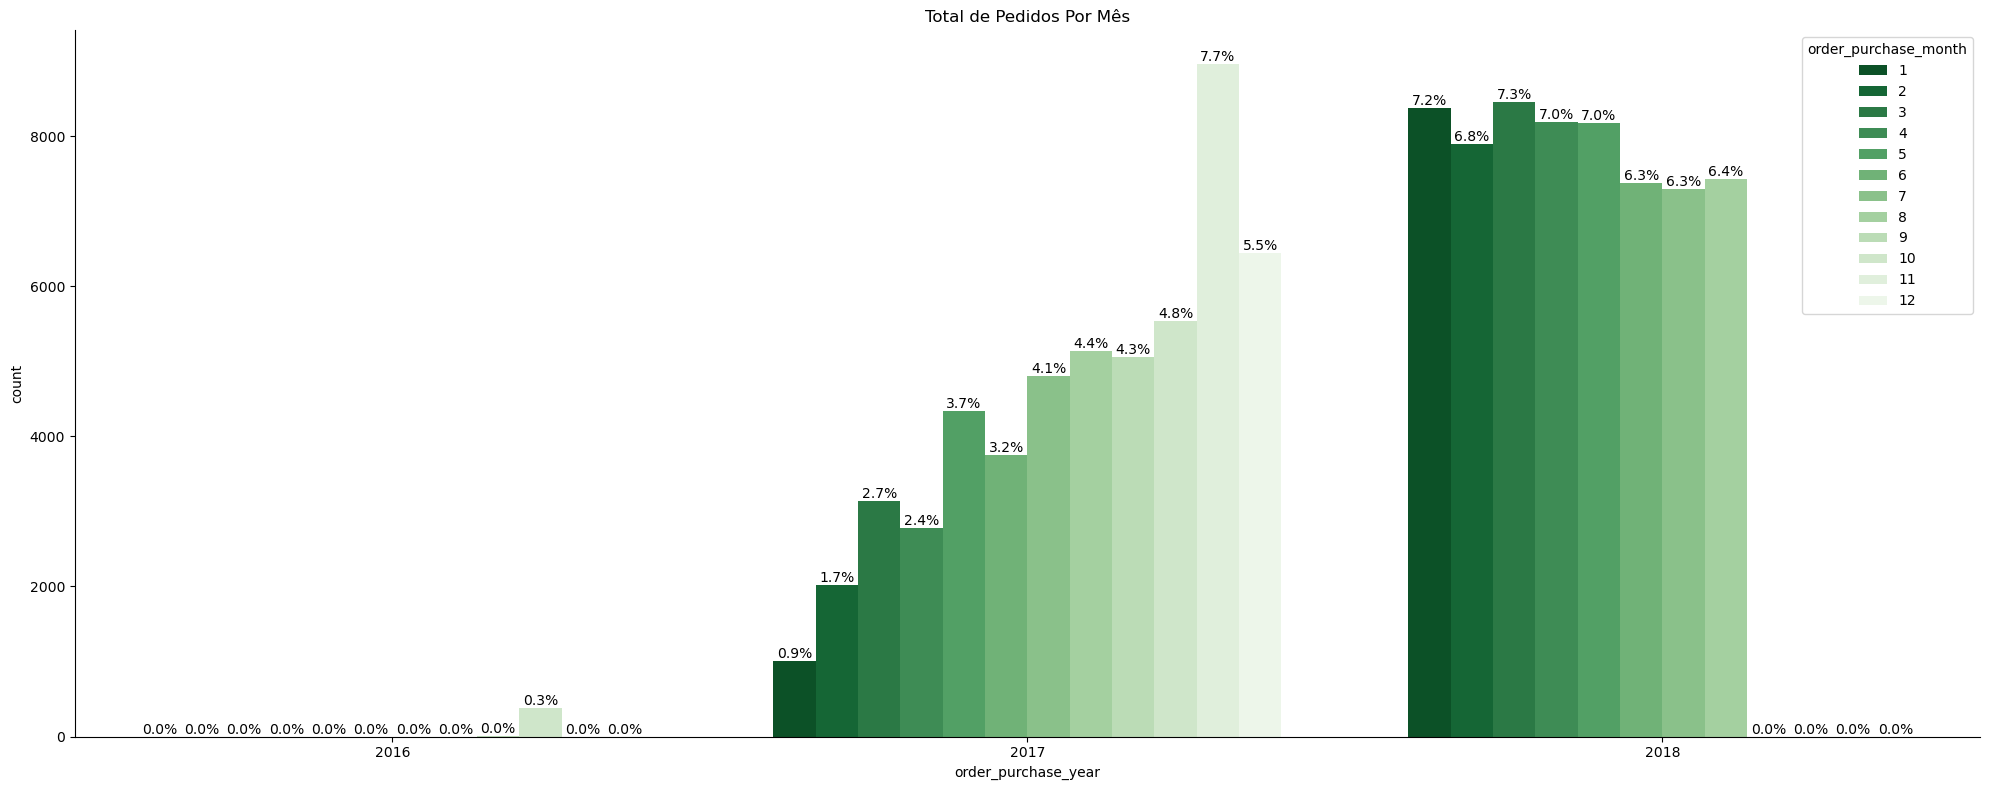

In [16]:
# Total de Pedidos Por Mês e Por Ano
fig, axs = plt.subplots(1, 1, figsize = (20, 8))
dsa_count_plot(feature = 'order_purchase_year', 
               df = df, 
               ax = axs, 
               hue = 'order_purchase_month', 
               title = 'Total de Pedidos Por Mês')
plt.show();

### Pergunta 1.3 - Como Foi a Performance de Vendas Por Dia da Semana em Cada Ano (em Termos Percentuais)?

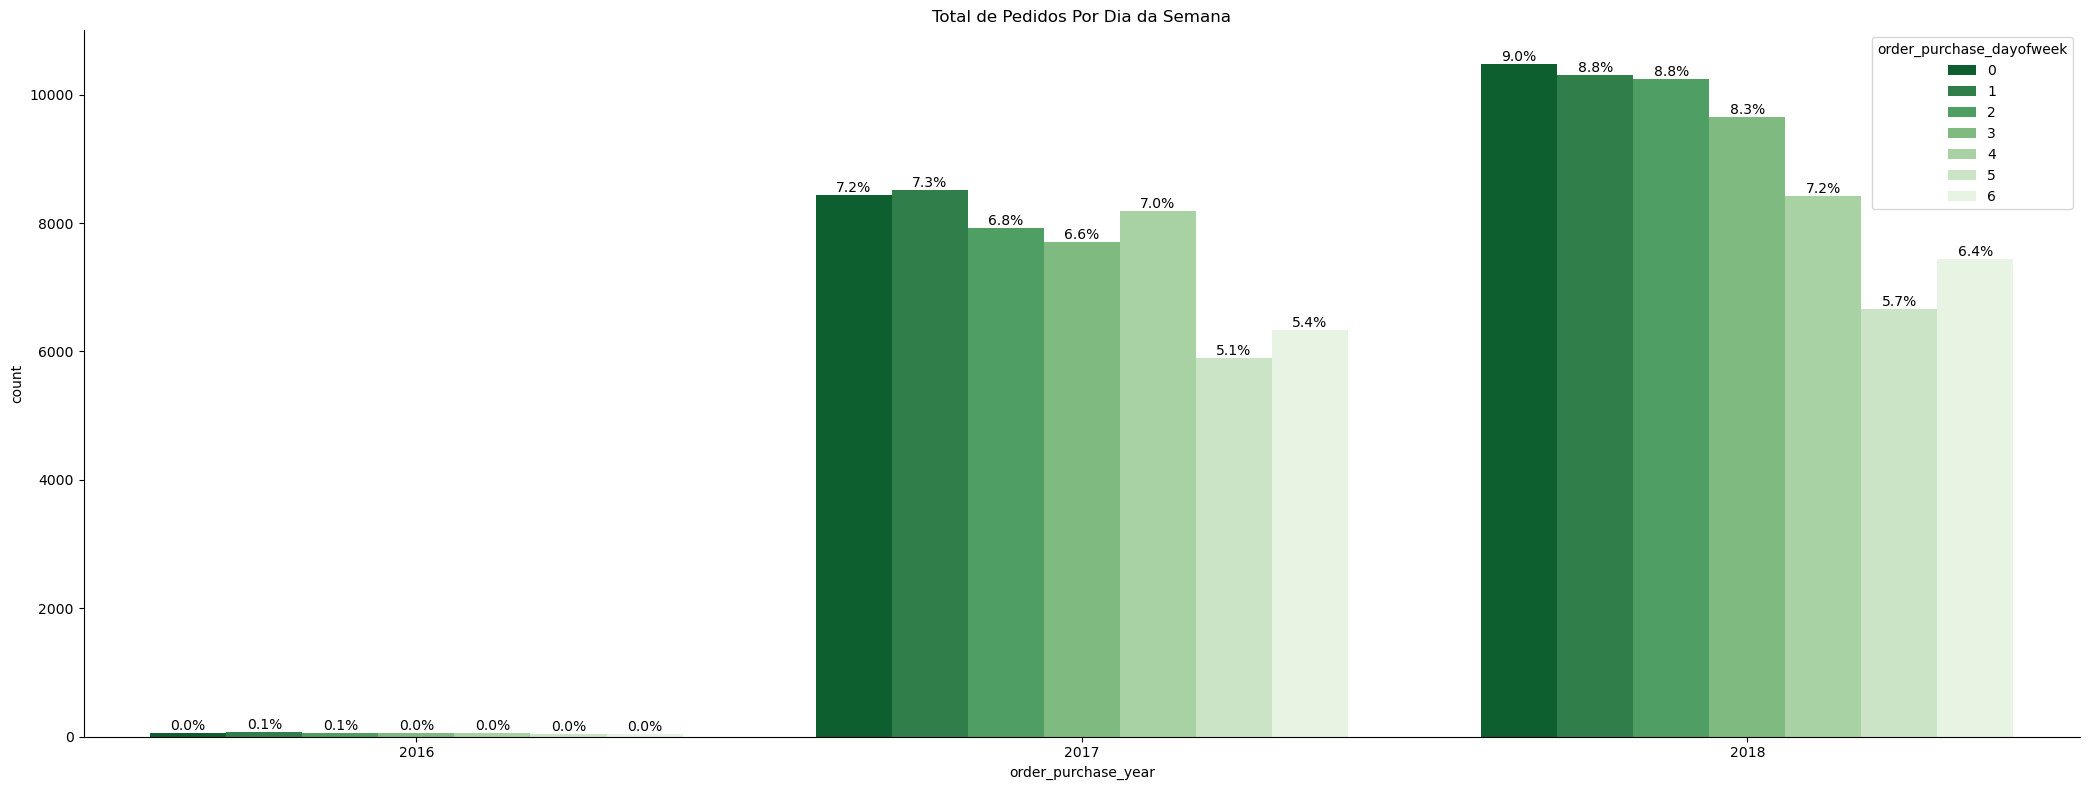

In [17]:
# Total de Pedidos Por Dia da Semana em Cada Ano
fig, axs = plt.subplots(1, 1, figsize = (21, 8))
dsa_count_plot(feature = 'order_purchase_year', 
               df = df, 
               ax = axs, 
               hue = 'order_purchase_dayofweek', 
               title = 'Total de Pedidos Por Dia da Semana')
plt.show();

ATENÇÃO: O primeiro dia da semana é segunda-feira (índice zero) nesse conjunto de dados.

### Pergunta 1.4 - Responda a Pergunta 2 em Termos Absolutos

In [18]:
# Agrupamento por vendas anuais e mensais
df_ytsales = df.groupby(['order_purchase_year', 'order_purchase_month'], 
                        as_index = False).sum().loc[:, ['order_purchase_year', 
                                                        'order_purchase_month', 
                                                        'payment_value']]

In [19]:
# Prepara os dataframes
df_s2016 = df_ytsales[df_ytsales['order_purchase_year']==2016]
df_s2017 = df_ytsales[df_ytsales['order_purchase_year']==2017]
df_s2018 = df_ytsales[df_ytsales['order_purchase_year']==2018]

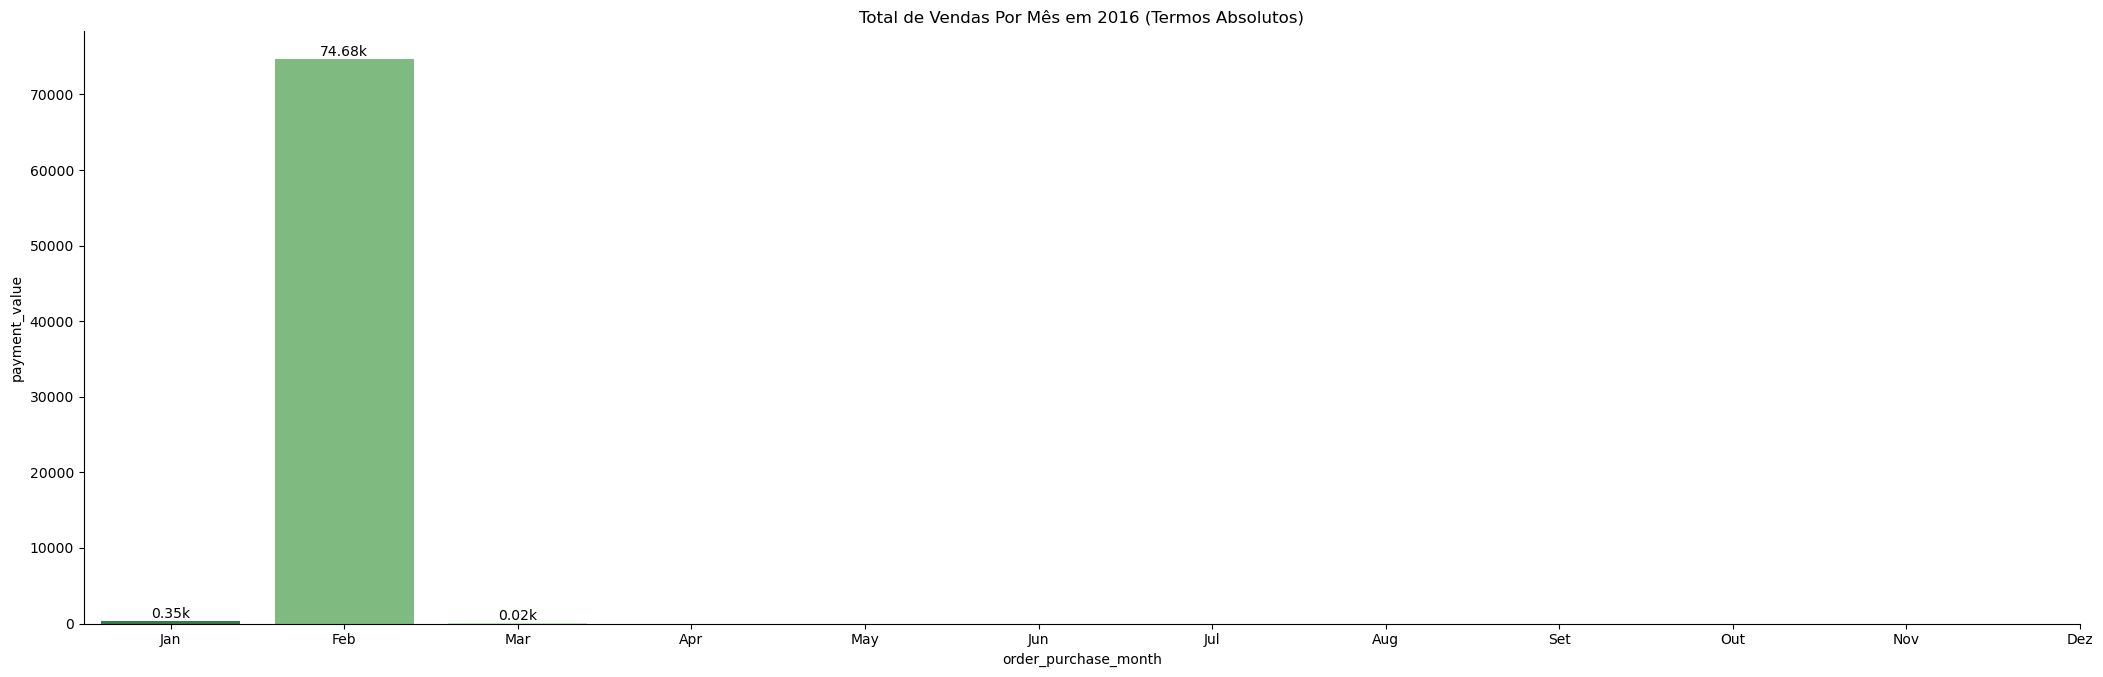

In [20]:
# Total de Vendas Por Mês em 2016 (Termos Absolutos)
fig, axs = plt.subplots(1, 1, figsize = (21, 7))
dsa_bar_plot(x = 'order_purchase_month', y = 'payment_value', df = df_s2016, ax = axs, value = True)
axs.set_title('Total de Vendas Por Mês em 2016 (Termos Absolutos)')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

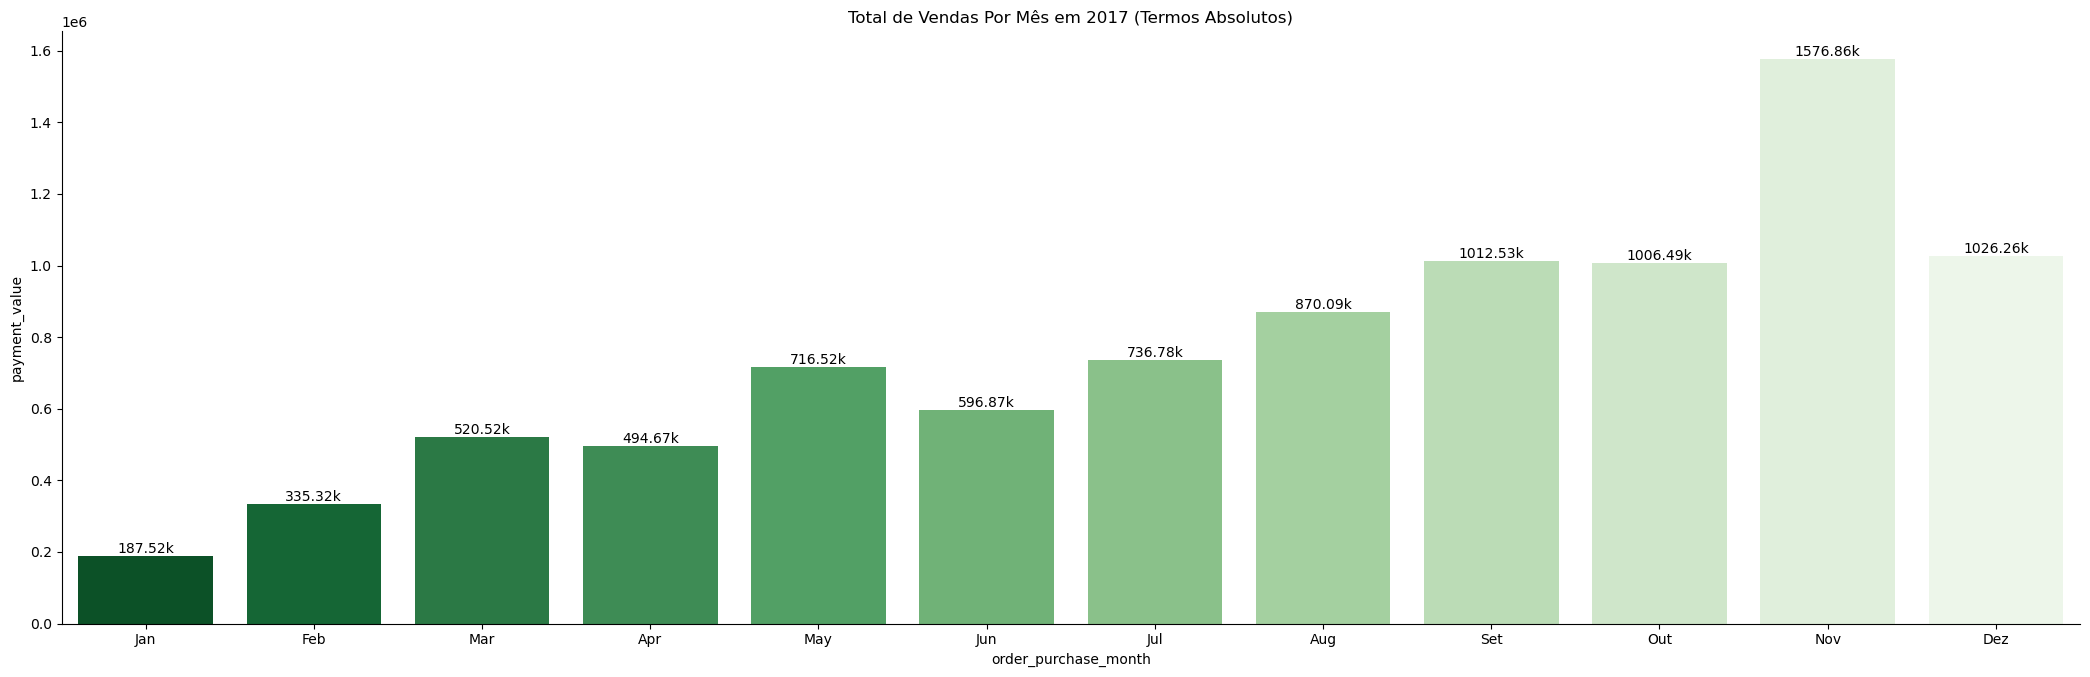

In [21]:
# Total de Vendas Por Mês em 2017 (Termos Absolutos)
fig, axs = plt.subplots(1, 1, figsize = (21, 7))
dsa_bar_plot(x = 'order_purchase_month', y = 'payment_value', df = df_s2017, ax = axs, value = True)
axs.set_title('Total de Vendas Por Mês em 2017 (Termos Absolutos)')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

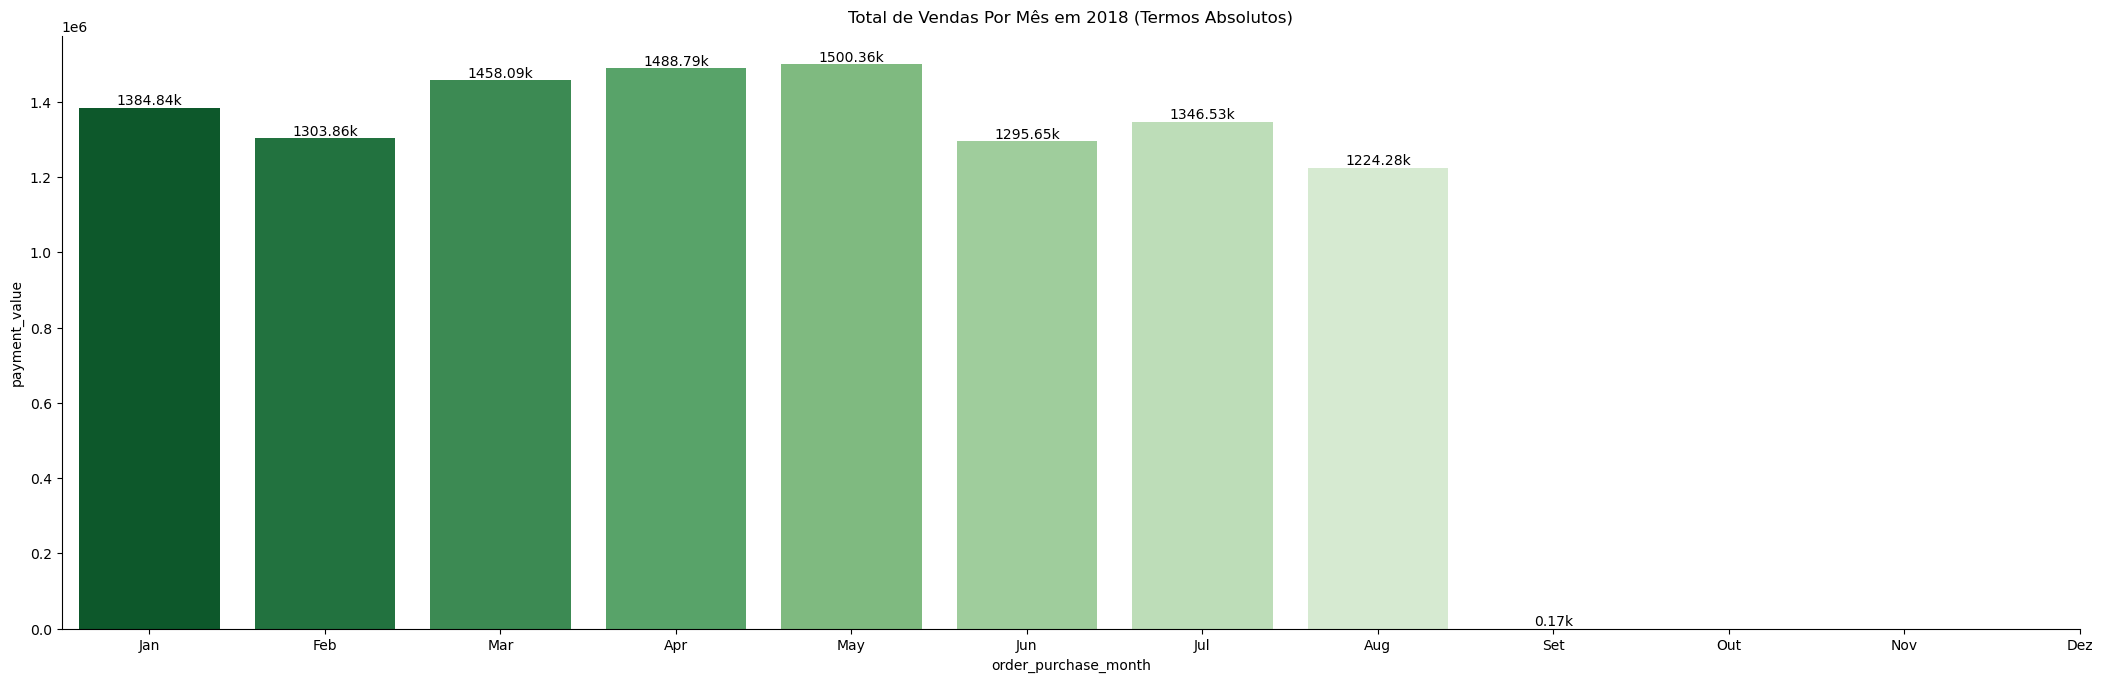

In [22]:
# Total de Vendas Por Mês em 2018 (Termos Absolutos)
fig, axs = plt.subplots(1, 1, figsize = (21, 7))
dsa_bar_plot(x = 'order_purchase_month', y = 'payment_value', df = df_s2018, ax = axs, value = True)
axs.set_title('Total de Vendas Por Mês em 2018 (Termos Absolutos)', pad = 10)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

### Pergunta 1.5 - Demonstre a Linha do Tempo da Evolução da Performance de Vendas 

In [24]:
# Alterando o atributo de mês para ordenação correta
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [25]:
# Criando nova coluna ano-mês
df_ytsales['month_year'] = df_ytsales['order_purchase_year'].astype(str) + '-' + df_ytsales['order_purchase_month'].astype(str)
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(int)

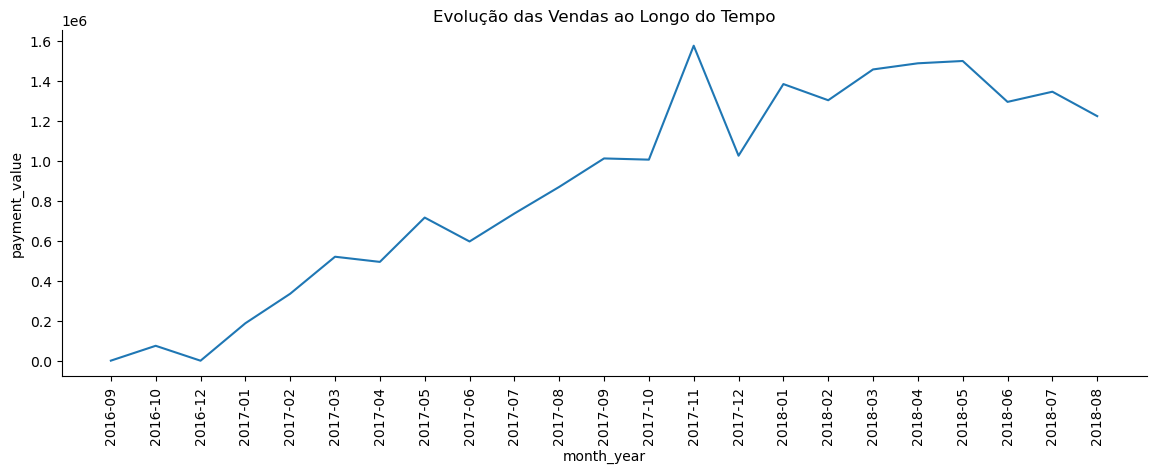

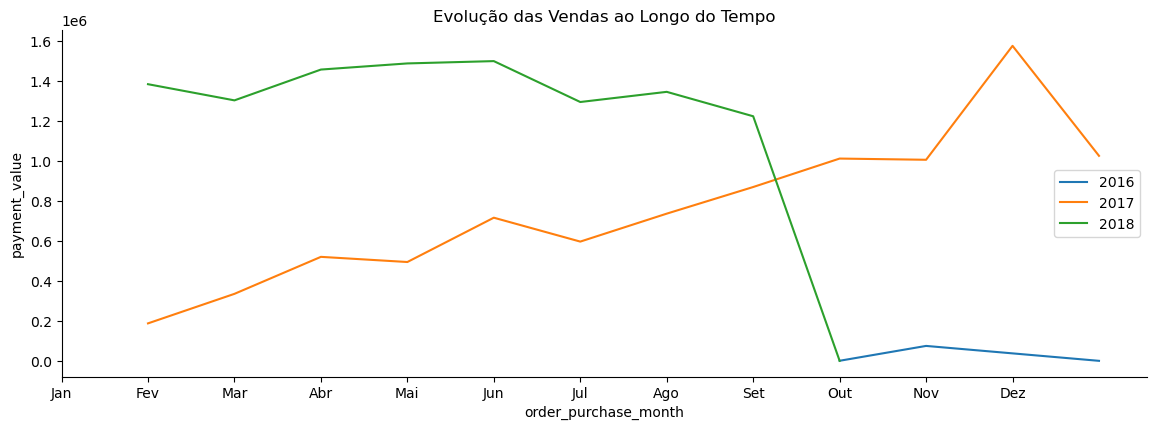

In [26]:
# Evolução das Vendas ao Longo do Tempo 

# Primeiro gráfico
fig, ax = plt.subplots(figsize = (14, 4.5))
ax = sns.lineplot(x = 'month_year', y = 'payment_value', data = df_ytsales.iloc[:-1, :])
dsa_format_spines(ax, right_border = False)
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_title('Evolução das Vendas ao Longo do Tempo')
plt.show()

# Segundo gráfico
fig, ax = plt.subplots(figsize = (14, 4.5))
ax = sns.lineplot(x = 'order_purchase_month', y = 'payment_value', data = df_s2016, label = '2016')
ax = sns.lineplot(x = 'order_purchase_month', y = 'payment_value', data = df_s2017, label = '2017')
ax = sns.lineplot(x = 'order_purchase_month', y = 'payment_value', data = df_s2018, label = '2018')
dsa_format_spines(ax, right_border = False)
ax.set_title('Evolução das Vendas ao Longo do Tempo')
plt.xticks(np.arange(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

### Pergunta 1.6 - Matriz de Comportamento de Compra do Cliente Por Hora do Dia

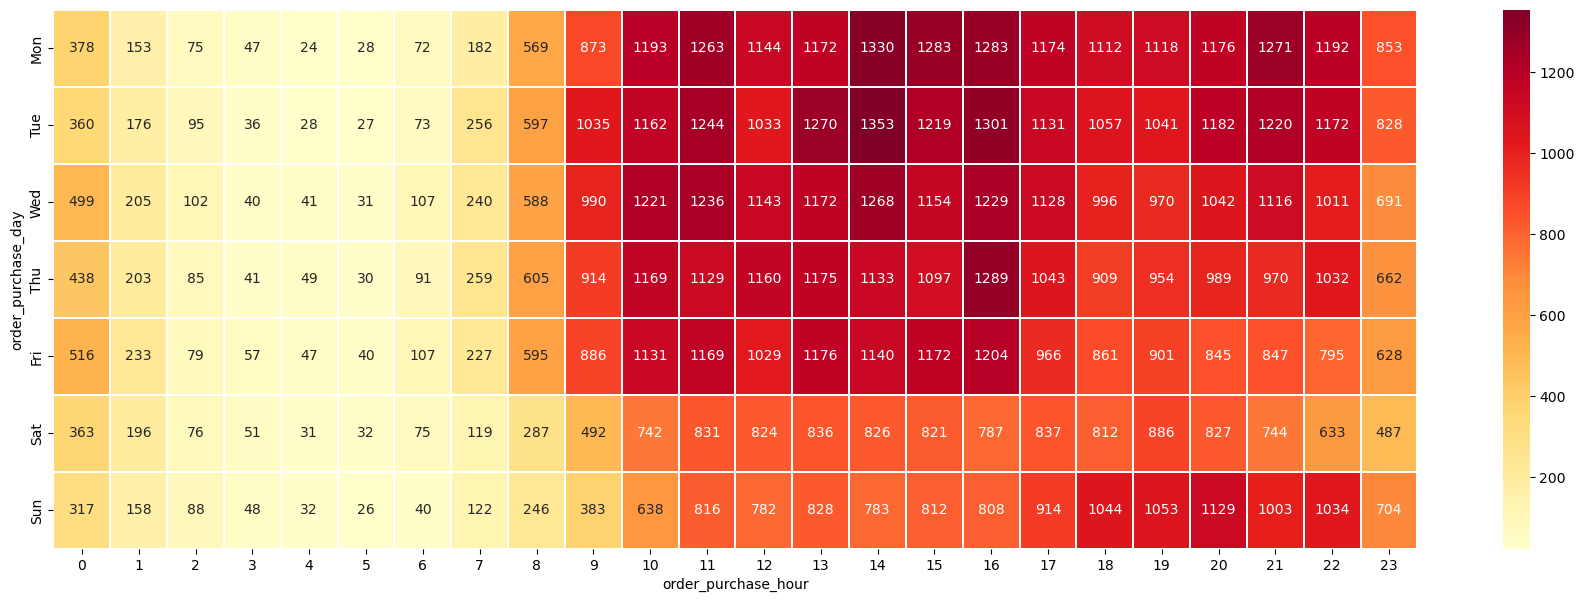

In [27]:
# Comportamento do cliente
purchase_count = df.groupby(['order_purchase_day', 'order_purchase_hour']).count()['price'].unstack()
plt.figure(figsize = (22,7))
sns.heatmap(purchase_count.reindex(index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']), 
            cmap = "YlOrRd", 
            annot = True, 
            fmt = "d", 
            linewidths = 0.2)
plt.show()

# Continuaremos no Próximo Capítulo!

In [27]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [28]:
#%watermark -v -m

In [29]:
#%watermark --iversions

# Fim